In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
# Load the dataset 
df = pd.read_csv("50_Startups.csv")

### Performing basic EDA

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [4]:
# Check null values 
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [5]:
# Get the description of dataset 
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
# Get the information of dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


### Visualize the distribution of features/columns 

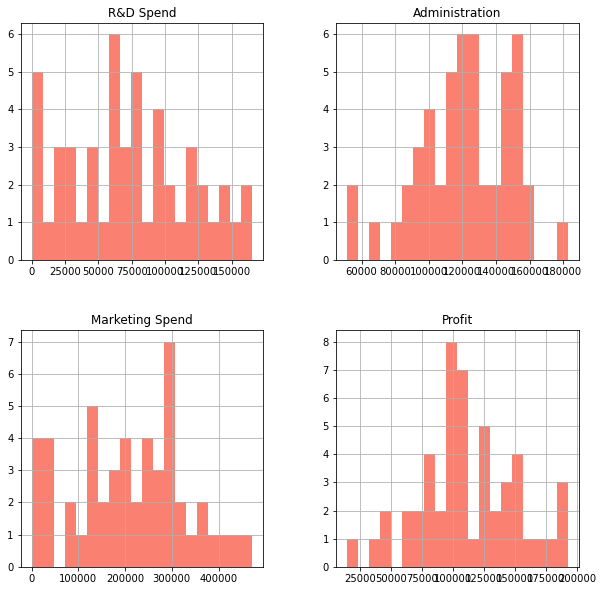

In [7]:
df.hist(bins=20, figsize=(10,10), color="salmon")
plt.show()

In [8]:
# Split the data indepenedant columns(X) and dependent column(y)
# X = df.iloc[:, :3]
# y = df.iloc[:, -1]
X = df.drop("Profit", axis=1)
y = df["Profit"]

In [9]:
# Split the data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40, 3), (10, 3), (40,), (10,))

In [11]:
# Scale Down the data as most of the values are high 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
models = {"Linear Regression: ": LinearRegression(), 
          "Ridge Regression: ": Ridge(),
          "Lasso Regression: ": Lasso(),
          "Random Forest Regression: ": RandomForestRegressor()}

In [13]:
for name, model in models.items():
    # Fit the train data 
    model.fit(X_train_scaled, y_train)
    
    # Predict the result 
    y_preds = model.predict(X_test_scaled)
    
    # Find the evaluation metrics
    r2 = r2_score(y_test, y_preds)
    mae = mean_absolute_error(y_test, y_preds)
    mse = mean_squared_error(y_test, y_preds)
    print(f'{name}: R2 score: {r2}, MSE: {mse}, MAE: {mae}')

Linear Regression: : R2 score: 0.9000653083037322, MSE: 80926321.2229515, MAE: 6979.152252370402
Ridge Regression: : R2 score: 0.8959706730651118, MSE: 84242124.38386503, MAE: 7396.361275433284
Lasso Regression: : R2 score: 0.9000880312435071, MSE: 80907920.3664307, MAE: 6978.451298067108
Random Forest Regression: : R2 score: 0.8962942439941148, MSE: 83980099.21027979, MAE: 6369.884870000007


### Conclusion 

The `Linear Regression Model` performs slightly better than the other models, with the highest R2 score and lowest MSE and MAE values.